## Observations and Insights 

In [1]:
#Observations of data for treatment of skin cancer
#1. The drugs Capomulin and Ramicane have the lowest average tumour volume in mice

#2. For a mouse using Capomuling it shows that over the timepoints the tumour volume reduces drastically with there 
#being a slight upward trend in the tumour volume after a certain timepoint of about 35 days

#3. The correlation coefficient of 0.84 shows that there is a strong correlation 
#between the weight and the average tumour volume of the mice

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
# Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
#Total unique mice and total in the data
number_of_mice_data = combine_data['Mouse ID'].count()
number_of_mice = combine_data['Mouse ID'].nunique()
print(number_of_mice)
print(number_of_mice_data)

249
1893


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combine_data[combine_data.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combine_data.loc[combine_data["Mouse ID"] == "g989",:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_data.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
#Total unique mice and total in the data after dropping duplicates
new_number_of_mice_data = clean_data['Mouse ID'].count()
new_number_of_mice = clean_data['Mouse ID'].nunique()
print(new_number_of_mice)
print(new_number_of_mice_data)

249
1888


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_data = clean_data.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumour volume. 

ave_tumour_vol = drug_data["Tumour Volume (mm3)"].mean()
median_tumour_vol = drug_data["Tumour Volume (mm3)"].median()
var_tumour_vol = drug_data["Tumour Volume (mm3)"].var()
stdev_tumour_vol = drug_data["Tumour Volume (mm3)"].std()
sem_tumour_vol = drug_data["Tumour Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

drug_summ_1 = pd.DataFrame({"Mean Tumour Vol (mm3)":ave_tumour_vol,
                          "Medain Tumour Vol (mm3)":median_tumour_vol,
                          "Variance Tumour Vol (mm3)":var_tumour_vol,
                          "Std Deviation Tumour Vol (mm3)":stdev_tumour_vol,
                          "Sem Tumour Vol (mm3)":sem_tumour_vol})

drug_summ_1.style.format({"Mean Tumour Vol (mm3)": "{:.2f}", "Medain Tumour Vol (mm3)": "{:.2f}", "Variance Tumour Vol (mm3)": "{:.2f}", "Std Deviation Tumour Vol (mm3)": "{:.2f}", "Sem Tumour Vol (mm3)": "{:.2f}"})


,Mean Tumour Vol (mm3),Medain Tumour Vol (mm3),Variance Tumour Vol (mm3),Std Deviation Tumour Vol (mm3),Sem Tumour Vol (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_summ_2 = drug_data["Tumour Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

drug_summ_2 = drug_summ_2.rename(columns={"mean": "Mean Tumour Vol (mm3)",
                          "median": "Medain Tumour Vol (mm3)",
                          "var": "Variance Tumour Vol (mm3)",
                          "std": "Std Deviation Tumour Vol (mm3)",
                          "sem": "Sem Tumour Vol (mm3)"})

drug_summ_2.style.format({"Mean Tumour Vol (mm3)": "{:.2f}", "Medain Tumour Vol (mm3)": "{:.2f}", "Variance Tumour Vol (mm3)": "{:.2f}", "Std Deviation Tumour Vol (mm3)": "{:.2f}", "Sem Tumour Vol (mm3)": "{:.2f}"})


,Mean Tumour Vol (mm3),Medain Tumour Vol (mm3),Variance Tumour Vol (mm3),Std Deviation Tumour Vol (mm3),Sem Tumour Vol (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

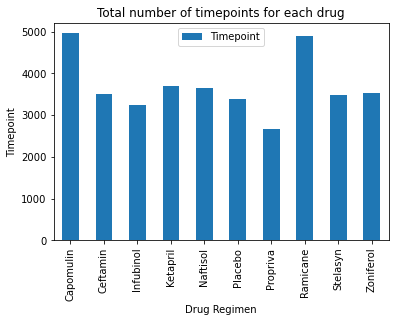

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot_data = clean_data.groupby(["Drug Regimen"]).agg({"Timepoint":"sum"})
plot_df = pd.DataFrame(bar_plot_data)
plot_df.plot.bar(x=None, y=None, title="Total number of timepoints for each drug")
plt.ylabel("Timepoint");

 

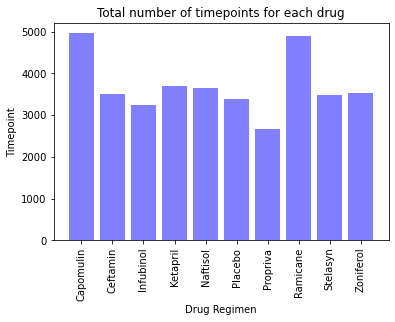

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
y_axis = bar_plot_data["Timepoint"]

plt.bar(drugs, y_axis, color='b', alpha=0.5, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.title("Total number of timepoints for each drug")
plt.xticks(rotation=90)
plt.show();


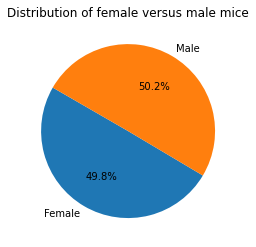

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot_data = clean_data.groupby(["Sex"]).agg({"Mouse ID":"nunique"})
pie_df = pd.DataFrame(pie_plot_data)
pie = pie_df.plot.pie(x=None, y="Mouse ID", autopct="%1.1f%%", startangle=150, title='Distribution of female versus male mice', legend=None);
pie.yaxis.set_visible(False)

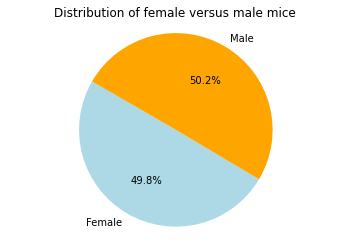

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Male"]
number = [124, 125]
colours = ["lightblue", "orange"]
explode = (0, 0)
plt.pie(number, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=False, startangle=150)
plt.title('Distribution of female versus male mice')
plt.axis('equal');
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumour = clean_data.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
final_tumour_summ = pd.merge(final_tumour, clean_data, on=(["Mouse ID", "Timepoint"]))
final_tumour_summ

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)
tumour_vol_list = []


# Locate the rows which contain mice on each drug and get the tumour volumes
       # add subset 
    
for treatment in treatments:
    tumour_data = final_tumour_summ.loc[final_tumour_summ["Drug Regimen"] == treatment]
    tumour_vol = tumour_data["Tumour Volume (mm3)"]
    tumour_vol_list.append(tumour_vol)
  
 # Calculate the IQR and quantitatively determine if there are any potential outliers.    

quartile0 = tumour_vol_list[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
iqr0 = upperq0-lowerq0

quartile1 = tumour_vol_list[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
iqr1 = upperq1-lowerq1

quartile2 = tumour_vol_list[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
iqr2 = upperq2-lowerq2

quartile3 = tumour_vol_list[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
iqr3 = upperq3-lowerq3
    
     # Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*iqr0)
upper_bound0 = upperq0 + (1.5*iqr0)

lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)

#Print the outliers
print(f"For {treatments[0]} values below {lower_bound0} and above {upper_bound0} could be outliers.")
print(f"For {treatments[1]} values below {lower_bound1} and above {upper_bound1} could be outliers.")
print(f"For {treatments[2]} values below {lower_bound2} and above {upper_bound2} could be outliers.")
print(f"For {treatments[3]} values below {lower_bound3} and above {upper_bound3} could be outliers.")

    

For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers.
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers.
For Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers.
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers.


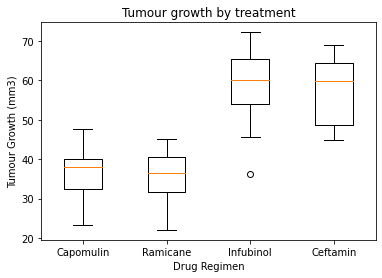

In [16]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(tumour_vol_list, labels=treatments)
ax1.set_title("Tumour growth by treatment")
ax1.set_ylabel("Tumour Growth (mm3)")
ax1.set_xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

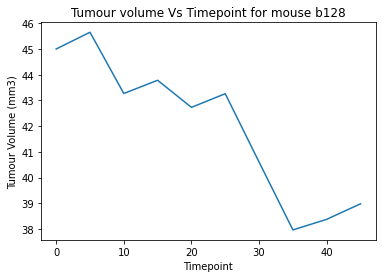

In [17]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
#select the mouse
mouse_b128 = capomulin_data.loc[capomulin_data["Mouse ID"] == "b128"]

x_axis = mouse_b128["Timepoint"]
y_axis = mouse_b128["Tumour Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Tumour volume Vs Timepoint for mouse b128")
plt.show()






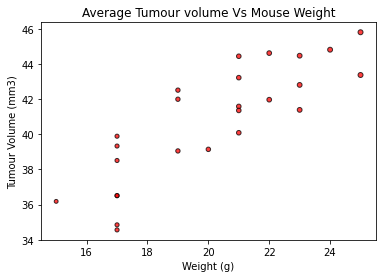

In [18]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
capomulin_data_mean = capomulin_data.groupby(["Mouse ID"]).agg({"Weight (g)": "mean", "Tumour Volume (mm3)": "mean"})
x = capomulin_data_mean['Weight (g)']
y = capomulin_data_mean['Tumour Volume (mm3)']
plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black", s=x, alpha=0.75);
plt.xlabel("Weight (g)")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Average Tumour volume Vs Mouse Weight")
plt.show()



## Correlation and Regression

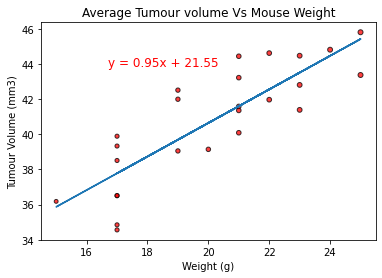

The correlation between mouse weight and average tumour volume is 0.84


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
capomulin_data_mean = capomulin_data.groupby(["Mouse ID"]).agg({"Weight (g)": "mean", "Tumour Volume (mm3)": "mean"})
x = capomulin_data_mean['Weight (g)']
y = capomulin_data_mean['Tumour Volume (mm3)']

correlation = st.pearsonr(x,y)

slope, intercept, rvalue, pvalue, std_err = st.linregress(x, y)
fit = slope * x + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black", s=x, alpha=0.75);
plt.xlabel("Weight (g)")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Average Tumour volume Vs Mouse Weight")
plt.plot(x,fit,"-")
plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=12,color="red")
plt.show()

print(f"The correlation between mouse weight and average tumour volume is {round(correlation[0],2)}")
